# Spectral densities from the inversion of $A_{m, \alpha}$

In [211]:
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt
mp.mp.dps = 50
plt.style.use('my_style.mplstyle')

def A_m_inv(m:int, alpha:float, dim:int, a:float):
    A = mp.matrix(int(dim))
    for i in range(int(dim)):
        A[i, i] = mp.gamma(2*m+1)/(2*(i+1))**(2*m+1) * (i+1)**(2*m) * a + alpha
        for j in range(i+1, int(dim)):
            A[i,j] = A[j, i] = mp.gamma(2*m+1)/(i+j+2)**(2*m+1) * ((i+1)*(j+1))**m * a
    
    #print(mp.eigh(A, eigvals_only=True))
    return A**-1

def mell_mat(s:float, m:int, a:float, corr:np.ndarray, A_inv):
    dim = A_inv.rows
    u = mp.matrix(np.zeros(dim))
    for i in range(dim):
        u[i] = (a * (i+1))**mp.mpc('-1/2', s)/mp.sqrt(2*mp.pi)
    vect = np.zeros(len(corr), dtype = complex)
    for i in range(len(corr)):
        print(mp.fabs(mp.gamma(mp.mpc(m+0.5, s)))**2.0 * (A_inv[i, :] * u)[0, 0])
        vect[i] = complex(a**2 * mp.fabs(mp.gamma(mp.mpc(m+0.5, s)))**2.0 * (a*(i+1))**m * (A_inv[i, :] * u)[0, 0])
    
    return (corr @ vect)

kernel_int = {
    "None" : lambda w, t, s, m: w**m * mp.exp(-w * t),
    "Gaussian" : lambda w, t, s, m: (mp.sqrt(2)*s)**((m-1))/mp.sqrt(mp.pi)*mp.exp(-w**2/(2*s**2))*\
        (s*mp.gamma((m+1)/2)*mp.hyp1f1((m+1)/2, 1/2, (s*t-w/s)**2/2)/mp.sqrt(2) + (w - s**2 * t)*mp.gamma(1+m/2)*mp.hyp1f1((m+2)/2, 3/2, (s*t-w/s)**2/2))
}

def rho_mat(w, m, a, corr:np.ndarray, A_inv, ker:str = "Gaussian", sigma:float=1):
    coeff = mp.matrix(np.zeros(len(corr)))
    for i in range(len(corr)):
        for j in range(A_inv.rows):
            coeff[i] += a**2 * (a * (i+1))**m * (a * (j+1))**m * A_inv[i, j] * kernel_int[ker](w, a*(j+1), sigma, m)
    return (corr @ np.array(coeff.tolist(), dtype = float))[0]


In [212]:
A = A_m_inv(2, 1e-30, 100, 1)
w = np.linspace(0, 1, 51)
r = np.zeros(len(w))
for wi in range(len(w)):
    r[wi] = rho_mat(w[wi], 2, 1, np.exp(-0.3*np.arange(1, 71)), A, "None", 270*0.065/197.3)

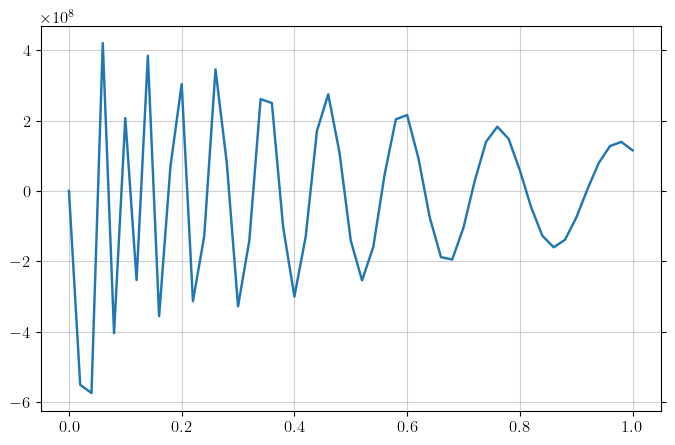

In [213]:
plt.plot(w, r)